#### Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
train_data = pd.read_csv('train.csv')
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [63]:
test_data=pd.read_csv('test.csv')
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


### Let's visualize the data to get a better understanding


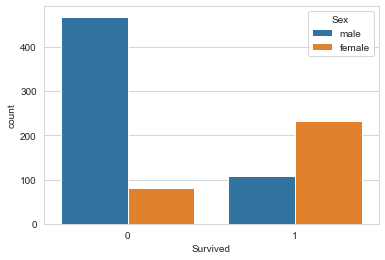

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_data,hue='Sex')

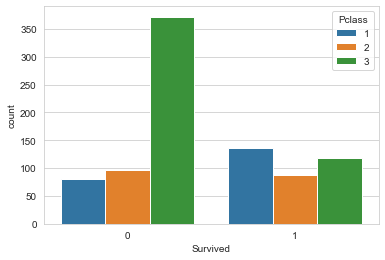

In [47]:
sns.countplot(x='Survived',hue='Pclass',data=train_data)

From the above we can see that, 70% of the women survived and most of the passengers in Pclass=3 didn't survive.

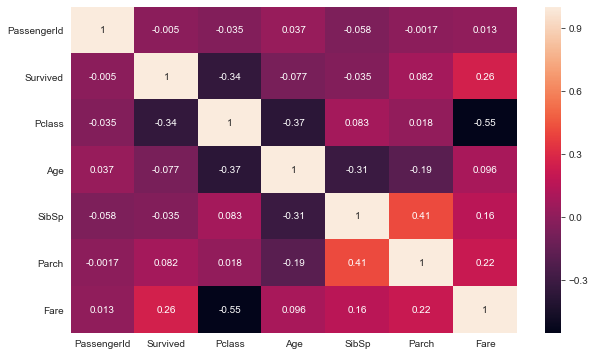

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(),annot=True)

## Implementing Random Forest Algorithm

We will look for patterns in four columns ['Pclass','Sex','Parch','Sibsp'] and will construct trees based on that pattern.

In [29]:
from sklearn.ensemble import RandomForestClassifier

y = train_data['Survived']
Features=['Pclass','Sex','Parch','Sibsp']
X=pd.get_dummies(train_data[Features])
X_test=pd.get_dummies(test_data[Features])

model = RandomForestClassifier(n_estimators=100,max_depth=3,random_state=1)
model.fit(X,y)
predictions=model.predict(X_test)

output= pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':predictions})
output.to_csv('output1.csv',index=False)

#### The End!